# Imports

In [53]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression, LogisticRegression
sns.set()

# Linear Regression

## Generate linear data with random noise. 

In [54]:
X = np.arange(-10, 10.5, 0.5)
Y = 2*X - 3
Y = Y + np.random.normal(0, 1, Y.shape[0])


In [55]:
X.shape, Y.shape


((41,), (41,))

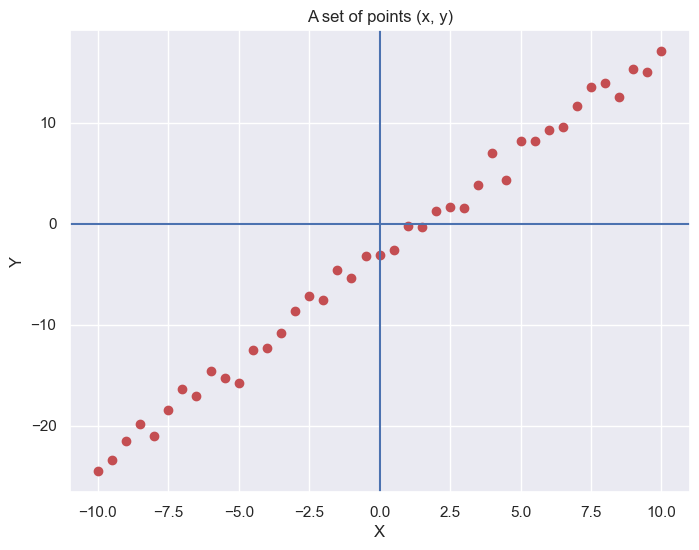

In [56]:
plt.figure(figsize=(8, 6))
plt.title("A set of points (x, y)")
plt.scatter(X, Y, c='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.axvline(x=0)
plt.axhline(y=0)
plt.show()

# Line of best fit
1.   Find the line of best fit using the formula of a and b.
2.   Check if you will get the same results with sklearn.
3.   Plot the line alongside the points.



In [57]:
def compute_line_of_best_fit(X, Y):
    """
    X: 1D np.array of type float representing the input
    Y: 1D np.array of type float representing the label
    return: (a, b) the line parameter
    """
    mean_x = X.mean()
    mean_y = Y.mean()
    A= ((X-mean_x)*(Y-mean_y)).sum()/((X-mean_x)**2).sum()
    b = mean_y -A*mean_x

    return A,b

a_1, b_1 = compute_line_of_best_fit(X, Y)
a_1, b_1


(2.057821709387537, -3.232136878967314)

In [58]:
def compute_line_of_best_fit_with_sklearn(X, Y):
    """
    X: 1D np.array of type float representing the input
    Y: 1D np.array of type float representing the label
    return: (a, b) the line parameter
    """
    # Initialize the model
    model = LinearRegression()
    X = X.reshape(-1, 1)
    Y = Y.reshape(-1, 1)
    # Fit the model
    model.fit(X, Y)
        # A is the slope, B is the intercept
    A = model.coef_[0]
    B = model.intercept_
    return A,B

a_2, b_2 = compute_line_of_best_fit_with_sklearn(X, Y)
a_2, b_2

(array([2.05782171]), array([-3.23213688]))

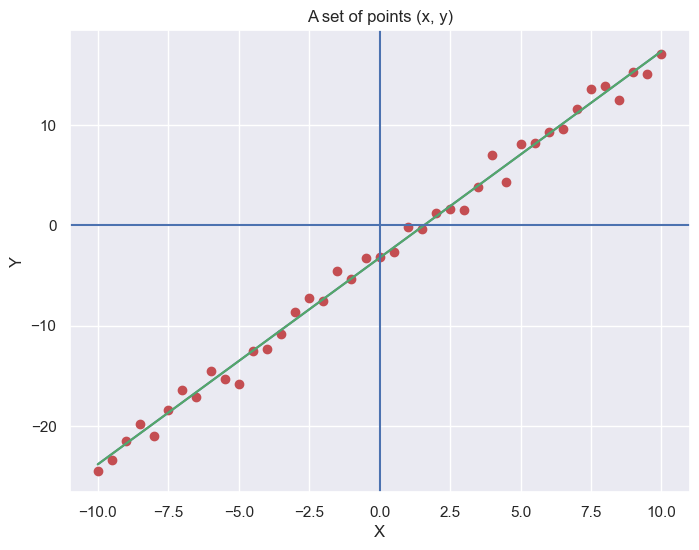

In [59]:
line_1 = a_1*X + b_1
line_2 = a_2*X + b_2
plt.figure(figsize=(8, 6))
plt.title("A set of points (x, y)")
plt.scatter(X, Y, c='r')
plt.plot(X, line_1, c='b')
plt.plot(X, line_2, c='g')
plt.xlabel('X')
plt.ylabel('Y')
plt.axvline(x=0)
plt.axhline(y=0)
plt.show()

## Generate linear data in high dimensional space
Be aware that the data is generated following the convention of _(number_of_features, number_of_samples)_.
All existing frameworks, including sklearn, use the convention _(number_of_samples, number_of_features)_.

In [60]:
p, q, n = 70, 50, 100
X = np.random.normal(0, 10, (p, n))
Y = np.random.normal(2, 5, (q, p))@X + np.random.normal(0, 10, (q, 1))

In [61]:
X.shape, Y.shape

((70, 100), (50, 100))

In [62]:
def compute_normal_equation(X, Y):
    """
    X: 2D np.array of shape (number_of_features, number_of_samples) representing the input
    Y: 2D np.array of shape (number_of_features, number_of_samples) representing the label
    """
    # Define the row of ones (same number of columns as A)
    row_of_ones = np.ones((1, X.shape[1]))  # Creates a 1xN array of one
    new_x = np.vstack((row_of_ones, X))
    second_terme = np.linalg.inv(np.dot(new_x,new_x.T))
    first_terme = np.dot(Y,new_x.T)
    A = np.dot(first_terme, second_terme)
    b = A[:, 0]
    a= A[:, 1:]
    return a,b

A_1, b_1 = compute_normal_equation(X, Y)

In [63]:
def compute_normal_equation_with_sklearn(X, Y):
    """
    X: 2D np.array of shape (number_of_features, number_of_samples) representing the inputs
    Y: 2D np.array of shape (number_of_features, number_of_samples) representing the labels
    """
    model = LinearRegression()

    model.fit(X.T, Y.T)
    # A is the slope, B is the intercept
    A = model.coef_
    B = model.intercept_
    return A,B

A_2, b_2 = compute_normal_equation_with_sklearn(X, Y)

In [64]:
# If matrices are allclose, the function will not output anything. Otherwise, it will raise an error
np.testing.assert_allclose(A_1, A_2)

In [65]:
np.testing.assert_allclose(b_1, b_2)

# Logistic Regression

## Generate random data that are linearly separable

In [66]:
x = np.arange(2, 23, 0.1)

y = 2*x + 10
y_1 = y + np.random.normal(0, 10, y.shape[0])


y = 2*x - 40
y_2 = y + np.random.normal(0, 10, y.shape[0])

X_1 = np.stack([x, y_1])
X_2 = np.stack([x, y_2])
X = np.concatenate([X_1, X_2], axis=1)
Y = np.array([0]*x.shape[0] + [1]*x.shape[0]).reshape(1, -1)

In [67]:
X.shape, Y.shape

((2, 420), (1, 420))

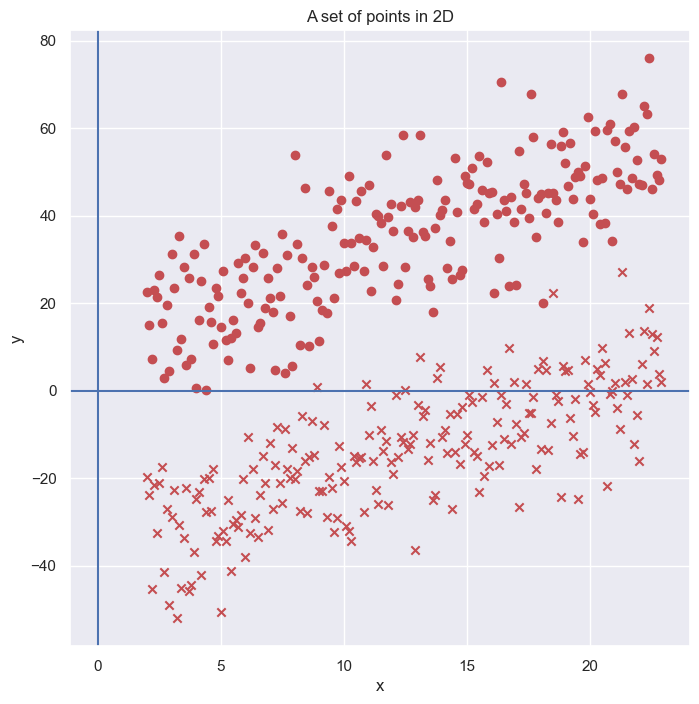

In [68]:
plt.figure(figsize=(8, 8))
plt.title("A set of points in 2D")
plt.scatter(x, y_1, c='r')
plt.scatter(x, y_2, c='r', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(x=0)
plt.axhline(y=0)

plt.show()

In [69]:
def sigmoid(x):
    """
    x: np.array of any shape to apply sigmoid elementwise on it.
    return: np.array
    """
    sigmoid = 1/(1+np.exp(x))
    return sigmoid

def logistic_regression(X, a, b):
    """
    X: np.array representing the input to the logistic regression
    a, b: parameters of the logisitc regression
    return: a probability value following the formula of logistic regression
    """
    return sigmoid(np.dot(a, X)+b)

def gradient_a(X, Y, pred):
    """
    Compute the average gradient w.r.t a
    X: input data
    Y: labels
    pred: predictions
    return: the gradient estimate w.r.t a
    """
    grad_a = np.mean((-Y + pred)*X, axis=1, keepdims=True).T
    return grad_a

def gradient_b(Y, pred):
    """
    Compute the average gradient w.r.t b
    Y: labels
    pred: predictions
    return: the gradient estimate w.r.t b
    """
    grad_b = np.mean(-Y + pred)
    return grad_b

In [70]:
def gradient_descent(X, Y, initial_a, initial_b, step):
    """
    Implement the gradient descent algorithm to find a and b.
    X: np.array representing the input data of shape (nb_features, nb_samples)
    Y: np.array representing the labels  of shape (1, nb_samples)
    initial_a: an initial guess for a of shape (1, nb_features)
    initial_b: an initial guess for b, a scalar.
    step: the learning rate
    return: a, b and the number of iterations
    """
    a, b = initial_a, initial_b

    pred = logistic_regression(X, a, b)
    grad_a = gradient_a(X, Y, pred)
    grad_b = gradient_b(Y, pred)

    count = 0
    while(np.mean(grad_a**2) > 1e-5 or np.abs(grad_b) > 1e-5):
        a = a - step*grad_a
        b = b - step*grad_b

        pred = logistic_regression(X, a, b)
        grad_a = gradient_a(X, Y, pred)
        grad_b = gradient_b(Y, pred)
        count +=1
        if count > 1e6:
            print("algorithm diverged!")
            break
    return a, b, count


def momentum_gradient_descent(X, Y, initial_a, initial_b, step, alpha):
    """
    Implement the gradient descent algorithm with momentum to find a and b.
    X: np.array representing the input data of shape (nb_features, nb_samples)
    Y: np.array representing the labels  of shape (1, nb_samples)
    initial_a: an initial guess for a of shape (1, nb_features)
    initial_b: an initial guess for b, a scalar.
    step: the learning rate
    alpha: the momentum value, between 0 and 1.
    return: a, b and the number of iterations
    """
    a, b = initial_a, initial_b

    v_a = np.zeros_like(initial_a)
    v_b = 0
    pred = logistic_regression(X, a, b)
    grad_a = gradient_a(X, Y, pred)
    grad_b = gradient_b(Y, pred)
    count = 0

    while(np.mean(grad_a**2) > 1e-5 or np.abs(grad_b) > 1e-5):
        v_a = alpha*v_a - step*grad_a
        v_b = alpha*v_b - step*grad_b
        a = a + v_a
        b = b + v_b

        pred = logistic_regression(X, a, b)
        grad_a = gradient_a(X, Y, pred)
        grad_b = gradient_b(Y, pred)
        count +=1
        if count >= 1e6:
            print("algorithm diverged!")
            break

    return a, b, count



step = 0.1
alpha = 0.99
initial_a, initial_b = np.random.normal(scale=0.1, size=(1, 2)), 0
a_1, b_1, count_1 = gradient_descent(X, Y, initial_a, initial_b, step)
a_2, b_2, count_2 = momentum_gradient_descent(X, Y, initial_a, initial_b, step, alpha)

C:\Users\charbel.alnasr\AppData\Local\Temp\ipykernel_15652\907990182.py:6: RuntimeWarning: overflow encountered in exp
  sigmoid = 1/(1+np.exp(x))


algorithm diverged!


In [ ]:
count_1, count_2

(1000001, 1000000)

In [ ]:
def logistic_regression_with_sklearn(X, Y):
    """
    X: 2D np.array of shape (number_of_features, number_of_samples) representing the input
    Y: 2D np.array of shape (1, number_of_samples) representing the labels
    """
    clf = LogisticRegression(penalty=None).fit(X.T, Y.flatten())
    return clf.coef_, clf.intercept_


a_3, b_3 = logistic_regression_with_sklearn(X, Y)

In [ ]:
def compute_2d_line_coefficients(a, b):
    """
    Compute the projection of the separation plan in 2D.
    return: scalar values a and b to plot the separation line in 2D.
    """
    return -a[0][0]/a[0][1], -b/a[0][1]

In [ ]:
a_1, b_1 = compute_2d_line_coefficients(a_1, b_1)
a_2, b_2 = compute_2d_line_coefficients(a_2, b_2)
a_3, b_3 = compute_2d_line_coefficients(a_3, b_3)

In [ ]:
print(f"Coefficient of line 1: a={a_1}, b={b_1}")
print(f"Coefficient of line 2: a={a_2}, b={b_2}")
print(f"Coefficient of line 3: a={a_3}, b={b_3}")

Coefficient of line 1: a=-0.08526534162812495, b=-0.004472125997330839
Coefficient of line 2: a=-0.0852647480163972, b=-0.0044720945919341035
Coefficient of line 3: a=2.3919647029829303, b=[-19.16571953]


In [ ]:
line_1 = a_1 * x + b_1
line_2 = a_2 * x + b_2
line_3 = a_3 * x + b_3

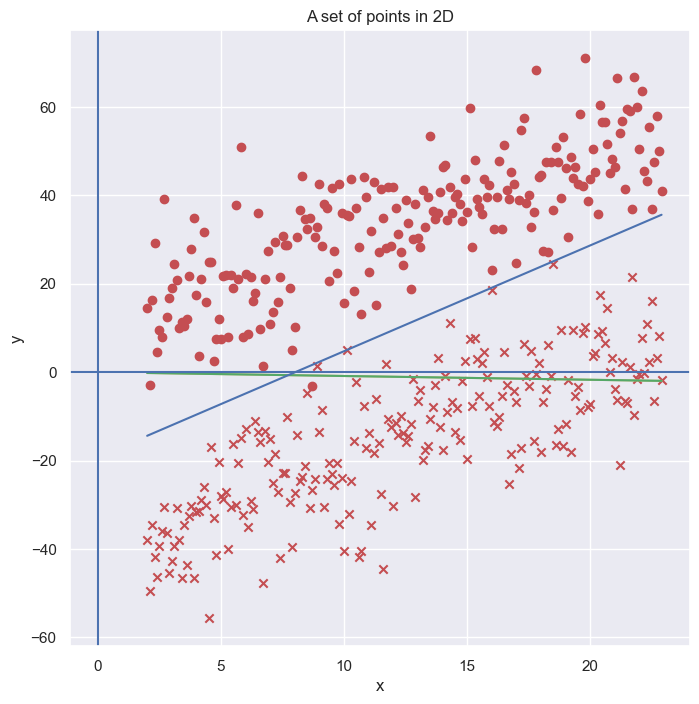

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("A set of points in 2D")
plt.scatter(x, y_1, c='r')
plt.scatter(x, y_2, c='r', marker='x')
plt.plot(x, line_1, c='y')
plt.plot(x, line_2, c='g')
plt.plot(x, line_3, c='b')
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(x=0)
plt.axhline(y=0)

plt.show()